# PandaRoot Digitalization Plots

Plots of the **MC Hits** in the tracking systems of the PANDA detector, created with PandaRoot.

## Python Imports

Import the required python packages

In [157]:
# For file system manipulation
from pathlib import Path

# Python IO for ROOT files
import uproot

# IO for yaml files
import yaml

# To render latex in prints
from IPython.display import display, Latex

# Numpy for array manipulation
import numpy as np

# For interactive plotting
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Circle

# Seaborn for plotting and styling
import seaborn as sns

# Pandas for data frame manipulation
import pandas as pd

# Utilities for extracting information from the data saved in the ROOT files
from utils.data_processing import (
    get_branch_entry,
    make_track_dict,
    get_all_mother_ids,
    get_process_ids,
    get_process_tex_str,
    is_signal_particle,
)

# Utilities for plotting
from utils.plotting import plot_stt

## 2. IO Paths
---

Set the paths to the input and output files.

Name of the digitalization (prefix) that should be plotted:

In [158]:
project_name = "new_XiAntiXi"

### 2.1 Image Output

In [159]:
ml_project_image_path = "/home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/"

In [160]:
event_image_path_name = ml_project_image_path + project_name + "/digi/event"
event_image_path = Path(event_image_path_name)

# Check if the directory already exists
if not event_image_path.exists():
    event_image_path.mkdir(parents=True)  # Create a new directory
    print(f"Directory {event_image_path} created.")
else:
    print(f"Directory {event_image_path_name} already exists.")

Directory /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/new_XiAntiXi/digi/event already exists.


### 2.2 ROOT Data Input

In [161]:
sim_file_path_name = "/home/nikin105/mlProject/data/simulations/XiAntiXi/root/sim/new_XiAntiXi_0_sim.root"
digi_file_path_name = "/home/nikin105/mlProject/data/simulations/XiAntiXi/root/digi/new_XiAntiXi_0_digi.root"

In [162]:
# Check if the file exists
sim_file_path = Path(sim_file_path_name)
if sim_file_path.is_file():
    print(f"File {sim_file_path} exists.")
else:
    raise FileNotFoundError(f"File {sim_file_path} does not exist.")

# Check if the file exists
digi_file_path = Path(digi_file_path_name)
if digi_file_path.is_file():
    print(f"File {digi_file_path} exists.")
else:
    raise FileNotFoundError(f"File {digi_file_path} does not exist.")

File /home/nikin105/mlProject/data/simulations/XiAntiXi/root/sim/new_XiAntiXi_0_sim.root exists.
File /home/nikin105/mlProject/data/simulations/XiAntiXi/root/digi/new_XiAntiXi_0_digi.root exists.


### 2.3 STT Tube Geometry Input

In [163]:
stt_geo_file_path_name = "/home/nikin105/mlProject/data/detectorGeometries/tubePos.csv"

In [164]:
# Check if the file exists
stt_geo_file_path = Path(stt_geo_file_path_name)
if stt_geo_file_path.is_file():
    print(f"File {stt_geo_file_path} exists.")
else:
    raise FileNotFoundError(f"File {stt_geo_file_path} does not exist.")

stt_geo = pd.read_csv(
    filepath_or_buffer=stt_geo_file_path_name,
    usecols=["x", "y"],
)

File /home/nikin105/mlProject/data/detectorGeometries/tubePos.csv exists.


### 2.5 Signal Signature Input

In [165]:
signal_signature_path_name = f"signal_signatures/signal_signature_{project_name}.yaml"

In [166]:
with open(signal_signature_path_name, "r") as file:
    signal_signature = yaml.safe_load(file)

signal_processes = signal_signature["particle_ids"]
signal_process_ids = signal_signature["process_codes"]
print("Signal MC IDs: ", signal_processes)
print("Signal Process codes: ", signal_process_ids)

Signal MC IDs:  [[88888, 3312], [88888, -3312], [88888, 3312, -211], [88888, -3312, 211], [88888, 3312, 3122], [88888, -3312, -3122], [88888, 3312, 3122, -211], [88888, -3312, -3122, 211], [88888, 3312, 3122, 2212], [88888, -3312, -3122, -2212]]
Signal Process codes:  [[0, 0], [0, 0, 4], [0, 0, 4, 4]]


## 3. PandaRoot Digitalization Parameters

---

A description of the the parameters provided in the PandaRoot "_sim.root" file.

#### Straw Tube Detector (STT) : `STTHit`

pos and mom are given in x, y, and z coordinates in the lab frame

| Parameter Name	| Description 											| Unit	| Type			|	 Class							|
|-------------------|-------------------------------------------------------|-------|---------------|-----------------------------------|
| UniqueID			| Object unique identifier								| -		| UInt_t		| TObject							|
| Bits				| Bit field status word									| -		| UInt_t		| TObject 							|
| Link				| 														| -		| unique_ptr	| FairMultiLinkedData_Interface		|
| TimeStamp			| Time of digit or Hit 									| ns	| Double_t		| FairHit							|
| TimeStampError	| Errors of the time of digit or Hit					| ns	| Doulbe_t		| FairHit							|
| D(x,y,z)			| Errors in position coordinates						| cm	| Double32_t	| FairHit							|
| RefIndex			| Index of FairMCPoint for this hit						| -		| Int_t			| FairHit							|
| DetectorID		| Detector unique volume ID								| -		| Int_t			| FairHit							|
| (X,Y,Z)			| Position coordinates of the tube 						| cm	| Double32_t	| FairHit							|
| TubeID			| Unique tube ID										| -		| Int_t			| PndSttHit							|
| Pulse				| Time pulse											| ns	| Double_t		| PndSttHit							|
| Isochrone			| The radial measurement								| cm	| Double_t		| PndSttHit							|
| IsochroneError	| The error on on the radial measurement				| cm	| Double_t		| PndSttHit							|
| DepCharge			| Deposited charge										| -		| Double_t		| PndSttHit							|

#### Micro Vertex Detector (MVD) : `MVDHitsPixel` & `MVDHitsStrip`

pos and mom are given in x, y, and z coordinates in the lab frame

| Parameter Name	| Description 											| Unit	| Type			|	 Class							|
|-------------------|-------------------------------------------------------|-------|---------------|-----------------------------------|
| UniqueID			| Object unique identifier								| -		| UInt_t		| TObject							|
| Bits				| Bit field status word									| -		| UInt_t		| TObject 							|
| Link				| 														| -		| unique_ptr	| FairMultiLinkedData_Interface		|
| TimeStamp			| Time of digit or Hit 									| ns	| Double_t		| FairHit							|
| TimeStampError	| Errors of the time of digit or Hit					| ns	| Doulbe_t		| FairHit							|
| D(x,y,z)			| Errors in position coordinates						| cm	| Double32_t	| FairHit							|
| RefIndex			| Index of FairMCPoint for this hit						| -		| Int_t			| FairHit							|
| DetectorID		| Detector unique volume ID								| -		| Int_t			| FairHit							|
| (X,Y,Z)			| Position coordinates of the tube 						| cm	| Double32_t	| FairHit							|
| SensorID			| Sensor ID												| -		| Int_t			| PndSdsHit (?)
| Charge			| Charge measured in hit								| e		| Double_t		| PndSdsHit (?)
| NDigiHits			| Number of pixels fired for this event					| -		| Int_t			| PndSdsHit (?)
| ClusterIndex		| Cluster number										| -		| Int_t			| PndSdsHit (?)
| BotIndex			| Bottom Cluster ID (?)									| -		| Int_t			| PndSdsHit (?)
| Cov				| Covariance matrix of the hit position (?)				| cm	| TMatrixD		| PndSdsHit (?)

## 4. Data Preparation
---

Import and process the data that should be visualized.


In [167]:
sim_tree = uproot.open(
    sim_file_path_name + ":pndsim",
)

digi_tree = uproot.open(
    digi_file_path_name + ":pndsim",
)

# Get the number of entries in the tree
n_entries = sim_tree.num_entries

### 4.1 Process ROOT Branches

Get the data of one entry from the `pndsim` trees.

**Select the entry to be plotted:**

In [168]:
entry_id = 0

In [169]:
# Make a list with the names of the MCTrack parameter to be read
mc_track_parameter_names = [
    "PdgCode",
    "MotherID",
    "SecondMotherID",
    "Process",
    "Points",
]

# Define a dictionary to store the MCTrack parameters
mc_track = {}

# Loop over all listed MCTrack parameters and get their values for the given entry
for branch_index in range(len(mc_track_parameter_names)):
    mc_track_parameter_name = mc_track_parameter_names[branch_index]
    mc_track_branch_name = "MCTrack.f" + mc_track_parameter_name
    mc_track[mc_track_parameter_name] = get_branch_entry(
        entry_id, mc_track_branch_name, sim_tree
    )

# Make a list with the names of the STTPoint parameter to be read
stt_point_parameter_names = ["TrackID"]

# Define a dictionary to store the STTPoint parameters
stt_point = {}

# Loop over all listed STTPoint parameters and get their values for the given entry
for branch_index in range(len(stt_point_parameter_names)):
    stt_point_parameter_name = stt_point_parameter_names[branch_index]
    stt_point_branch_name = "STTPoint.f" + stt_point_parameter_name
    stt_point[stt_point_parameter_name] = get_branch_entry(
        entry_id, stt_point_branch_name, sim_tree
    )

# Make a list with the names of the STTHit parameter to be read
stt_hit_parameter_names = [
    "X",
    "Y",
    "Z",
    "Dx",
    "Dy",
    "Dz",
    "Isochrone",
    "IsochroneError",
    "RefIndex",
    "DepCharge",
]

# Define a dictionary to store the STTHit parameters
stt_hit = {}

# Loop over all listed STTHit parameters and get their values for the given entry
for branch_index in range(len(stt_hit_parameter_names)):
    stt_hit_parameter_name = stt_hit_parameter_names[branch_index]
    stt_hit_branch_name = "STTHit.f" + stt_hit_parameter_name
    stt_hit[stt_hit_parameter_name] = get_branch_entry(
        entry_id, stt_hit_branch_name, digi_tree
    )

realStt_trackIDs = np.zeros(len(stt_hit["RefIndex"]), dtype=int)
for i in range(len(stt_hit["RefIndex"])):
    realStt_trackIDs[i] = stt_point["TrackID"][stt_hit["RefIndex"][i]]

isochronePerTrack = {}
isochronePerTrack = make_track_dict(realStt_trackIDs, stt_hit["Isochrone"], isochronePerTrack)

xPosPerTrack = {}
xPosPerTrack = make_track_dict(realStt_trackIDs, stt_hit["X"], xPosPerTrack)

yPosPerTrack = {}
yPosPerTrack = make_track_dict(realStt_trackIDs, stt_hit["Y"], yPosPerTrack)

#### 4.2.1 Tag Signal Particles

Specify the PDG MC IDs and VMC process codes corresponding to a signal particle

In [170]:
# Combine mother IDs and second mother IDs
mother_ids = get_all_mother_ids(mc_track["MotherID"], mc_track["SecondMotherID"])

# Iterate over all tracks that have hits in the STT
for track_id in xPosPerTrack:
    # Get the VMC process codes and PDG MC IDs for the track
    process_mc_ids, process_ids = get_process_ids(
        mc_track["Process"], mother_ids, mc_track["PdgCode"], int(track_id)
    )
    # Check if the track belongs to a signal particle
    print(
        "Is signal particle: ",
        is_signal_particle(
            process_mc_ids, process_ids, signal_processes, signal_process_ids
        ),
    )
    # Get and print the process leading to the track
    process_tex_str = get_process_tex_str(process_mc_ids)
    display(Latex(f"{process_tex_str}"))

Is signal particle:  True


<IPython.core.display.Latex object>

Is signal particle:  True


<IPython.core.display.Latex object>

Is signal particle:  True


<IPython.core.display.Latex object>

Is signal particle:  False


<IPython.core.display.Latex object>

Is signal particle:  True


<IPython.core.display.Latex object>

Is signal particle:  False


<IPython.core.display.Latex object>

## Plots

### Plot xy-Projections with color maps for various Parameters

#### Set the Parameters for the Plots

In [171]:
print(stt_hit["X"][-1], stt_hit["Y"][-1], stt_hit["Z"][-1], stt_hit["DepCharge"][-1], stt_hit["Isochrone"][-1])
print(stt_hit["X"][-2], stt_hit["Y"][-2], stt_hit["Z"][-2], stt_hit["DepCharge"][-2], stt_hit["Isochrone"][-2])

-8.746856689453125 -14.140000343322754 35.0 5346409.984427828 0.11380308920365349
-7.872170925140381 -14.645000457763672 35.0 4404490.4815509375 0.3035021268213898


Min charge:  343075.95647020155
Max charge:  187059207.71883628
Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/new_XiAntiXi/digi/event/xyProjectionDepCharge_0.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/new_XiAntiXi/digi/event/xyProjectionDepCharge_0.pdf


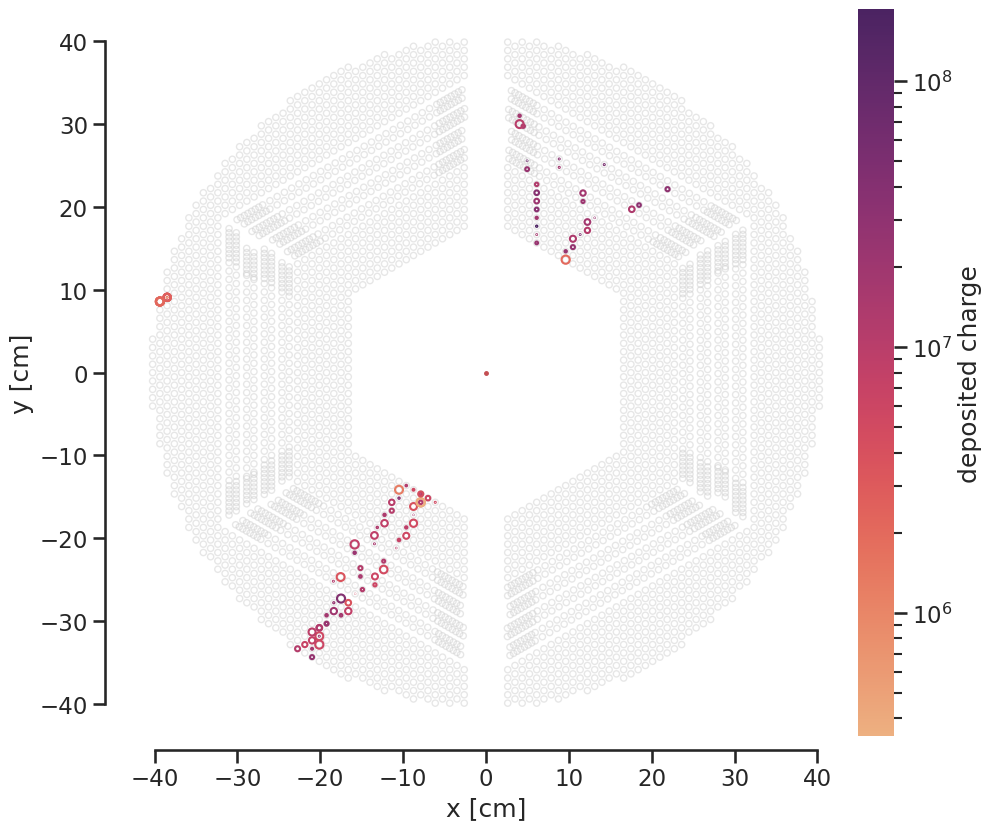

In [172]:
min_c = np.min(stt_hit["DepCharge"])
print("Min charge: ", min_c)

max_c = np.max(stt_hit["DepCharge"])
print("Max charge: ", max_c)

# Create a normalization object
cNorm = mcolors.LogNorm(vmin=min_c, vmax=max_c)

cmap = sns.color_palette("flare", as_cmap=True)

# Create a figure and axis with the STT tube layout in gray
fig, ax = plot_stt(useGrayScale=True, alpha=0.5)

# Plot the IP
ax.plot(0, 0, marker=".", ms=5, color="r")

colors = sns.color_palette("tab20")

trackNum = 0

numPoint = 0
for i in range(len(stt_hit["Isochrone"])):
    isochrone = Circle(
        (stt_hit["X"][i], stt_hit["Y"][i]),
        stt_hit["Isochrone"][i],
        ec=cmap(cNorm(stt_hit["DepCharge"][i])),
        lw=1.5,
        fc="None",
    )
    ax.add_patch(isochrone)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cbar = fig.colorbar(plt.cm.ScalarMappable(norm=cNorm, cmap=cmap),
             cax=cax, orientation='vertical', label='deposited charge')

cbar.outline.set_visible(False)

# Set the image path and name and save the image as a png and pdf
image_prefix = event_image_path_name + "/xyProjectionDepCharge_" + str(entry_id)
print("Saving png image to: ", image_prefix + ".png")
plt.savefig(image_prefix + ".png", dpi=300, bbox_inches="tight")
print("Saving pdf image to: ", image_prefix + ".pdf")
plt.savefig(image_prefix + ".pdf", dpi=300, bbox_inches="tight")

Saving png image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/new_XiAntiXi/digi/event/xyProjectionIsochrone_0.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/ML-Project/Images/simulations/new_XiAntiXi/digi/event/xyProjectionIsochrone_0.pdf


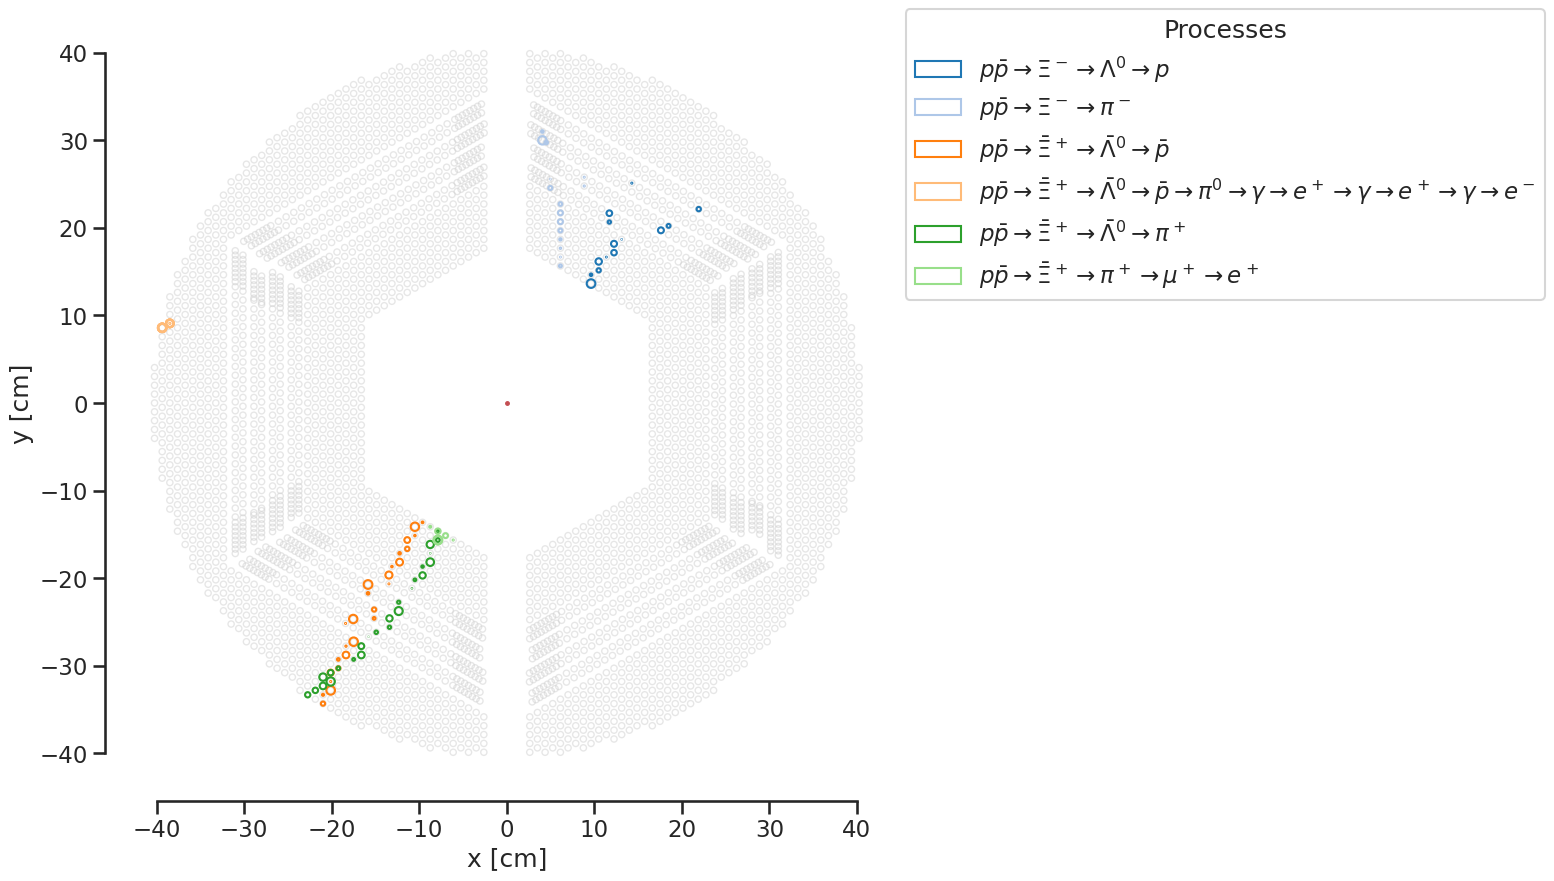

In [173]:
# Create a figure and axis with the STT tube layout in gray
fig, ax = plot_stt(useGrayScale=True, alpha=0.5)

# Plot the IP
ax.plot(0, 0, marker=".", ms=5, color="r")

colors = sns.color_palette("tab20")

trackNum = 0

for trackID in isochronePerTrack:
    pdg_mc_ids, process_codes = get_process_ids(
        process_ids=mc_track["Process"],
        mother_ids=mother_ids,
        pdg_ids=mc_track["PdgCode"],
        particle_id=int(trackID),
    )
    # Create a label for the track based on the PDG MC IDs
    track_label = get_process_tex_str(process_mc_ids=pdg_mc_ids)
    
    numPoint = 0
    for i in range(len(isochronePerTrack[trackID])):
        if numPoint == 0:
            isochrone = Circle(
                (xPosPerTrack[trackID][i], yPosPerTrack[trackID][i]),
                isochronePerTrack[trackID][i],
                ec=colors[trackNum],
                lw=1.5,
                fc="None",
                label=track_label,
            )
        else:
            isochrone = Circle(
                (xPosPerTrack[trackID][i], yPosPerTrack[trackID][i]),
                isochronePerTrack[trackID][i],
                ec=colors[trackNum],
                lw=1.5,
                fc="None",
            )
        ax.add_patch(isochrone)
        numPoint += 1
    trackNum += 1

fig.legend(title="Processes", loc="upper left", bbox_to_anchor=(0.9, 0.9))

# Set the image path and name and save the image as a png and pdf
image_prefix = event_image_path_name + "/xyProjectionIsochrone_" + str(entry_id)
print("Saving png image to: ", image_prefix + ".png")
plt.savefig(image_prefix + ".png", dpi=300, bbox_inches="tight")
print("Saving pdf image to: ", image_prefix + ".pdf")
plt.savefig(image_prefix + ".pdf", dpi=300, bbox_inches="tight")

#### Plot the xy-Projection of the STT Hits

NameError: name 'data' is not defined

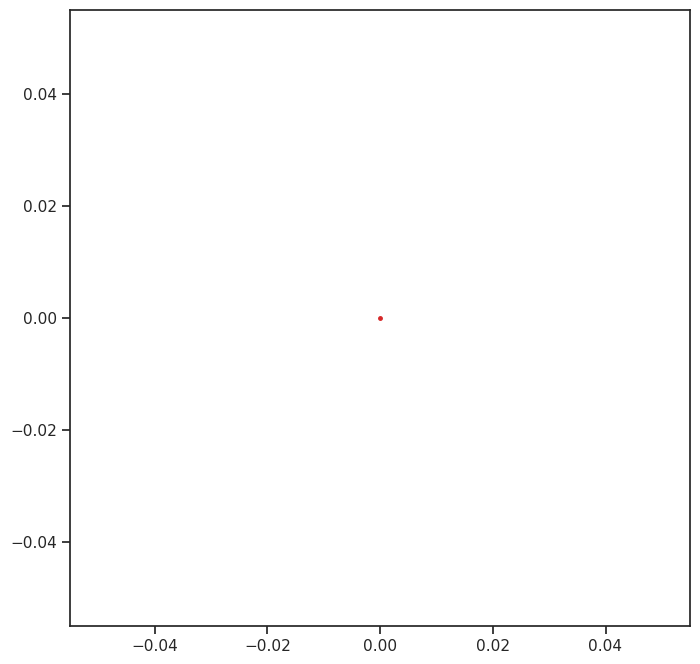

In [174]:
plt.close("all")

# Set the general style of the plot using seaborn
sns.set_theme()
sns.set_style("ticks")
sns.set_context("notebook")

numTracks = len(isochronePerTrack)
colors = sns.color_palette("husl", numTracks)

fig, ax = plt.subplots(figsize=(8, 8))

# Plot the IP
ax.plot(0, 0, marker=".", ms=5, color="tab:red")

# Plot the STT in the background
for index, row in data.iterrows():
    sttOuterTube = patches.Circle(
        (row["x[cm]"], row["y[cm]"]), row["outerRadius[cm]"], fc="gray", ec="None"
    )
    ax.add_patch(sttOuterTube)
    sttInnerTube = patches.Circle(
        (row["x[cm]"], row["y[cm]"]),
        row["innerRadius[cm]"],
        fc="white",
        ec="None",
        alpha=0.9,
    )
    ax.add_patch(sttInnerTube)

trackNum = 0

for trackID in isochronePerTrack:
    trackLabel = getProcess(
        int(trackID), mcTrack_pdgId, mcTrack_motherId, mcTrack_2ndMotherId
    )
    numPoint = 0
    for i in range(len(isochronePerTrack[trackID])):
        if numPoint == 0:
            isochrone = patches.Circle(
                (xPosPerTrack[trackID][i], yPosPerTrack[trackID][i]),
                isochronePerTrack[trackID][i],
                ec=colors[trackNum],
                lw=1,
                fc="None",
                label=trackLabel,
            )
        else:
            isochrone = patches.Circle(
                (xPosPerTrack[trackID][i], yPosPerTrack[trackID][i]),
                isochronePerTrack[trackID][i],
                ec=colors[trackNum],
                lw=1,
                fc="None",
            )
        ax.add_patch(isochrone)
        numPoint += 1
    trackNum += 1

# Set the axis labels and limits
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")

# Set the aspect ratio to be equal
ax.set_aspect("equal")

sns.despine(fig=fig, ax=ax, offset=10, trim=True)
fig.tight_layout()
fig.legend(title="Reactions\n(track id)", loc="upper left", bbox_to_anchor=(1, 1))

imgPath = imagePath + projectName + "_xyIsochrones_" + str(eventNumber)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")

NameError: name 'data' is not defined

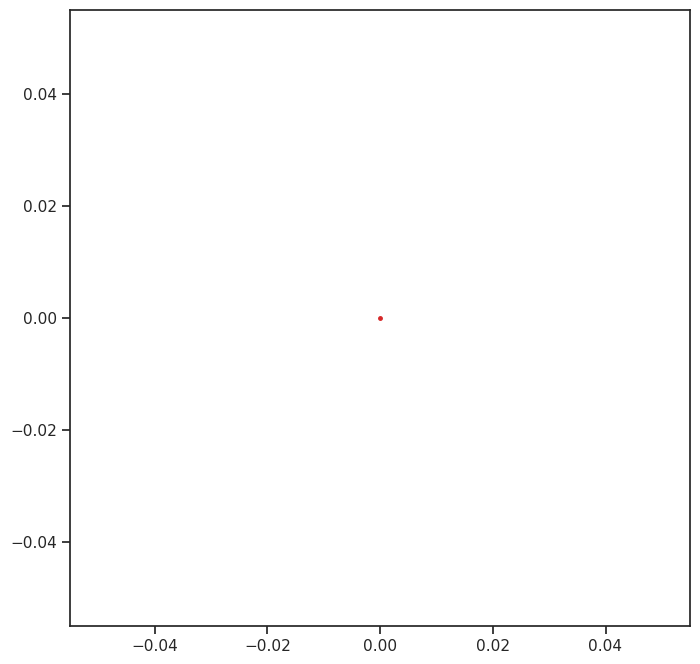

In [88]:
plt.close("all")

# Set the general style of the plot using seaborn
sns.set_theme()
sns.set_style("ticks")
sns.set_context("notebook")


numTracks = len(isochronePerTrack)
colors = sns.color_palette("husl", numTracks)

fig, ax = plt.subplots(figsize=(8, 8))

# Plot the IP
ax.plot(0, 0, marker=".", ms=5, color="tab:red")

# Plot the STT in the background
for index, row in data.iterrows():
    sttOuterTube = patches.Circle(
        (row["x[cm]"], row["y[cm]"]), row["outerRadius[cm]"], fc="gray", ec="None"
    )
    ax.add_patch(sttOuterTube)
    sttInnerTube = patches.Circle(
        (row["x[cm]"], row["y[cm]"]),
        row["innerRadius[cm]"],
        fc="white",
        ec="None",
        alpha=0.9,
    )
    ax.add_patch(sttInnerTube)

trackNum = 0

for trackID in isochronePerTrack:
    trackLabel = getProcess(
        int(trackID), mcTrack_pdgId, mcTrack_motherId, mcTrack_2ndMotherId
    )
    ax.plot(
        xPosPerTrack[trackID],
        yPosPerTrack[trackID],
        color=colors[trackNum],
        ls="None",
        marker="o",
        ms=3,
        label=trackLabel,
    )
    trackNum += 1

# Set the axis labels and limits
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")

# Set the aspect ratio to be equal
ax.set_aspect("equal")

sns.despine(fig=fig, ax=ax, offset=10, trim=True)
fig.tight_layout()
fig.legend(title="Reactions\n(track id)", loc="upper left", bbox_to_anchor=(1, 1))

imgPath = imagePath + projectName + "_xyProjection_" + str(eventNumber)

print("Saving png image to: ", imgPath + ".png")
plt.savefig(imgPath + ".png", dpi=300, bbox_inches="tight")

print("Saving pdf image to: ", imgPath + ".pdf")
plt.savefig(imgPath + ".pdf", dpi=300, bbox_inches="tight")